In [1]:
# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading the dataset

In [4]:
df = pd.read_csv('exchange_rate.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


In [6]:
df['date']

0       01-01-1990 00:00
1       02-01-1990 00:00
2       03-01-1990 00:00
3       04-01-1990 00:00
4       05-01-1990 00:00
              ...       
7583    06-10-2010 00:00
7584    07-10-2010 00:00
7585    08-10-2010 00:00
7586    09-10-2010 00:00
7587    10-10-2010 00:00
Name: date, Length: 7588, dtype: object

In [7]:
# converting date column to date type

In [10]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y %H:%M')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     7588 non-null   datetime64[ns]
 1   Ex_rate  7588 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 118.7 KB


In [12]:
# converting to dd-mm-yyyy format

In [13]:
df['date'] = df['date'].dt.strftime('%d-%m-%Y')

In [14]:
df['date']

0       01-01-1990
1       02-01-1990
2       03-01-1990
3       04-01-1990
4       05-01-1990
           ...    
7583    06-10-2010
7584    07-10-2010
7585    08-10-2010
7586    09-10-2010
7587    10-10-2010
Name: date, Length: 7588, dtype: object

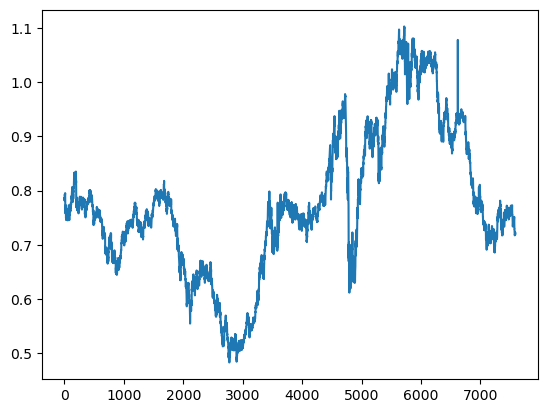

In [17]:
df['Ex_rate'].plot()
plt.show()

In [18]:
# Visualization

In [19]:
# Plotting ex_rate with respect to time

In [22]:
plt.plot(df['Ex_rate'], df['date'])
plt.show()

KeyboardInterrupt: 

In [26]:
# Studying Ex_rate

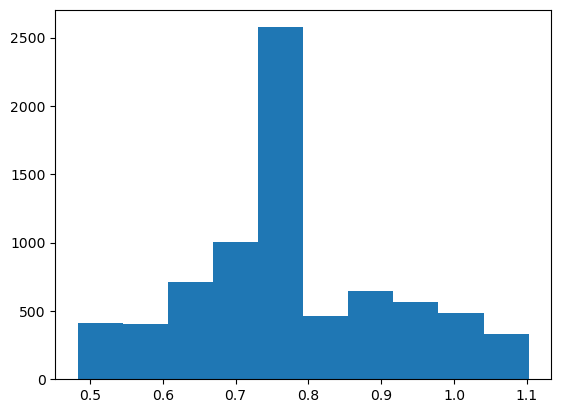

In [27]:
plt.hist(df['Ex_rate'])
plt.show()

In [28]:
df['Ex_rate'].skeww()

0.2611267376737365

In [29]:
# plotting box plot

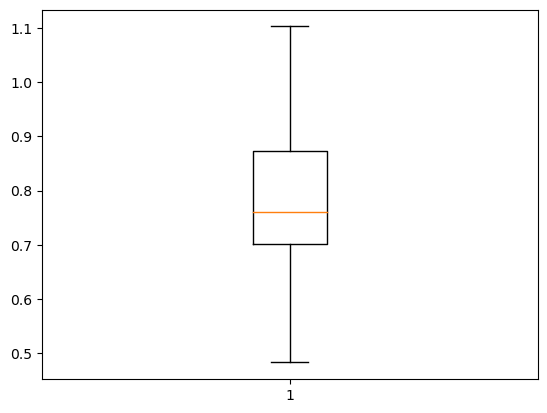

In [31]:
plt.boxplot(df['Ex_rate'])
plt.show()

In [32]:
# Here Ex_rate is narmal and there are no outliers

In [33]:
# Creating lag_plot

In [34]:
from pandas.plotting import lag_plot

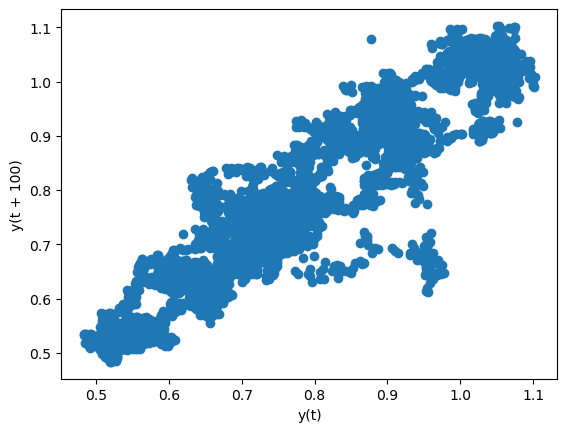

In [40]:
lag_plot(df['Ex_rate'], lag = 100)
plt.show()

In [41]:
# Creatting auto Correlation plot

In [50]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<Figure size 10000x15000 with 0 Axes>

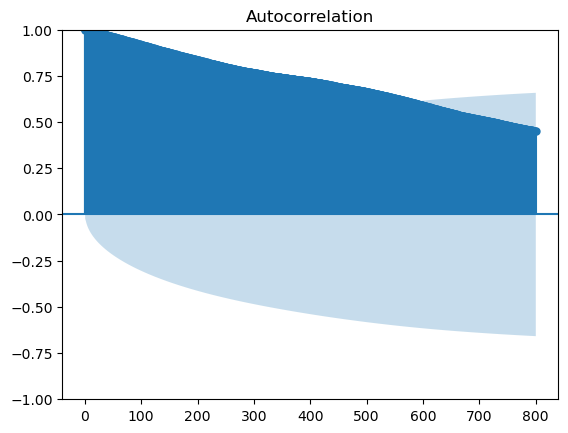

In [58]:
plt.figure(figsize=(100, 150))
plot_acf(df['Ex_rate'],lags=800)
plt.show()

<Figure size 10000x15000 with 0 Axes>

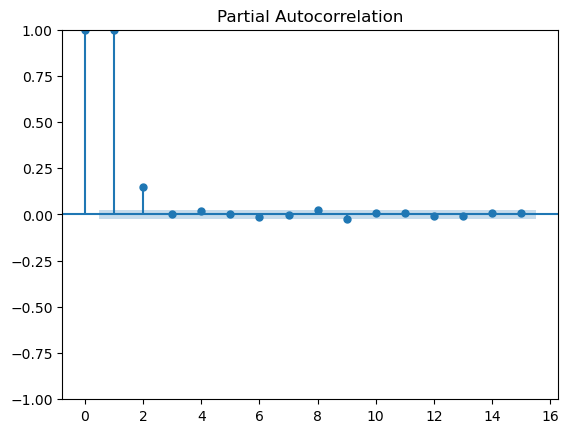

In [55]:
plt.figure(figsize=(100, 150))
plot_pacf(df['Ex_rate'],lags=15)
plt.show()

In [70]:
pip install pmdarima


     ------------------------------------ 615.0/615.0 kB 383.0 kB/s eta 0:00:00


In [97]:
import pmdarima as pm

# Assuming your time series data is in 'currency_data'

# Fit auto_arima
auto_arima_model = pm.auto_arima(df['Ex_rate'], start_p=1, start_q=1,
                                 test='adf',       # Use Augmented Dickey-Fuller test to find optimal 'd'
                                 max_p=100, max_q=100, # Maximum p and q values to search
                                 m=1,              # Seasonality (not used here)
                                 d=None,           # Let the model determine 'd'
                                 seasonal=True,   # No seasonal component
                                 start_P=0, D=0,   # Seasonal ARIMA parameters (not used here)
                                 trace=True,       # Print status messages
                                 error_action='ignore',  
                                 suppress_warnings=True, 
                                 stepwise=True)   # Use stepwise algorithm to speed up fitting

# Print model summary
print(auto_arima_model.summary())

# Get the selected p, d, and q values
selected_p, selected_d, selected_q = auto_arima_model.order
print("Selected p:", selected_p)
print("Selected d:", selected_d)
print("Selected q:", selected_q)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-56100.341, Time=5.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-55972.211, Time=4.89 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-56102.338, Time=2.35 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-56100.772, Time=7.56 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-55974.195, Time=0.94 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-56100.340, Time=4.54 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-56098.328, Time=10.94 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-56104.319, Time=0.89 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-56102.321, Time=1.13 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-56102.322, Time=3.26 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-56102.753, Time=1.75 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-56100.316, Time=5.59 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 49.096 seconds
                               SARIMAX Results                

In [79]:
from statsmodels.tsa.arima.model import ARIMA

In [99]:
model = ARIMA(df['Ex_rate'], order=(1, 1, 0))

In [100]:
arima_model = model.fit()

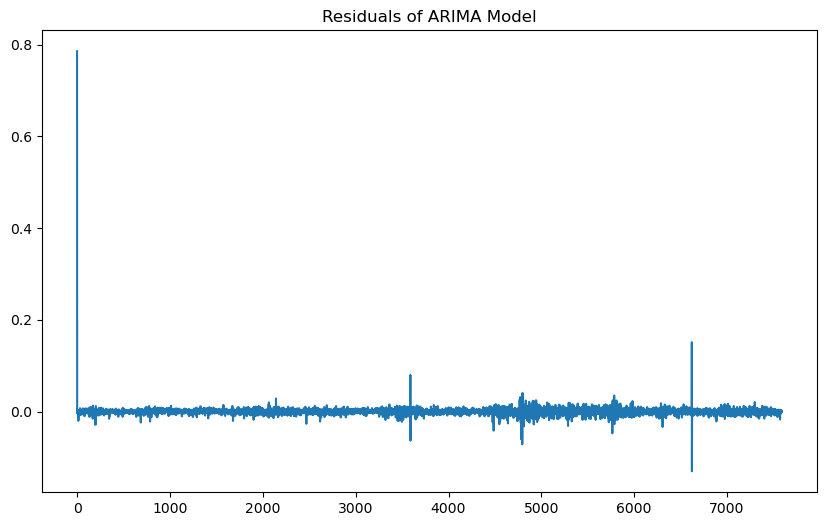

In [101]:
# Analyze residuals
residuals = arima_model.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.show()

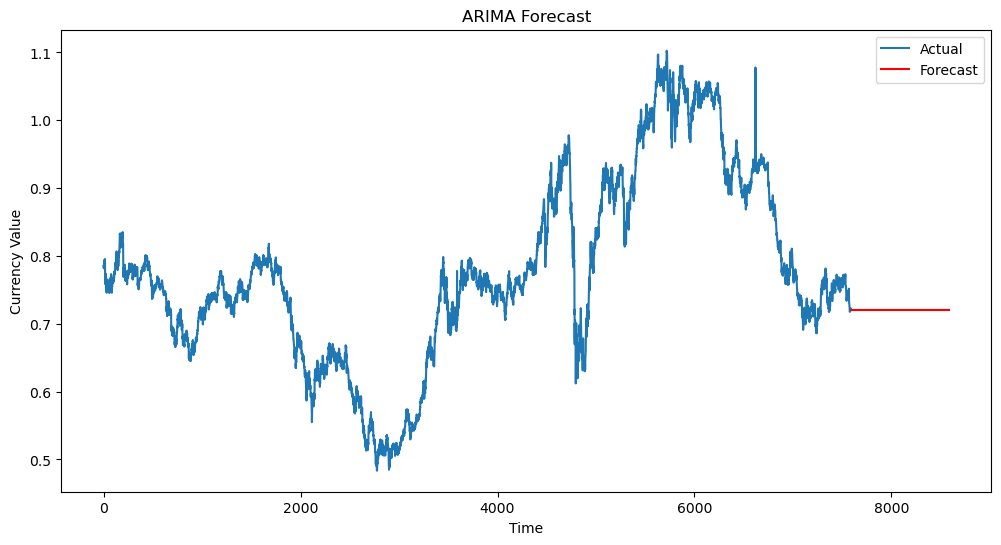

In [102]:
# Perform out-of-sample forecasting
forecast_horizon = 1000
forecast = arima_model.forecast(steps=forecast_horizon)

# Visualize forecast
plt.figure(figsize=(12, 6))
plt.plot(df['Ex_rate'], label='Actual')
plt.plot(range(len(df['Ex_rate']), len(df['Ex_rate']) + forecast_horizon), forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast')
plt.xlabel('Time')
plt.ylabel('Currency Value')
plt.legend()
plt.show()


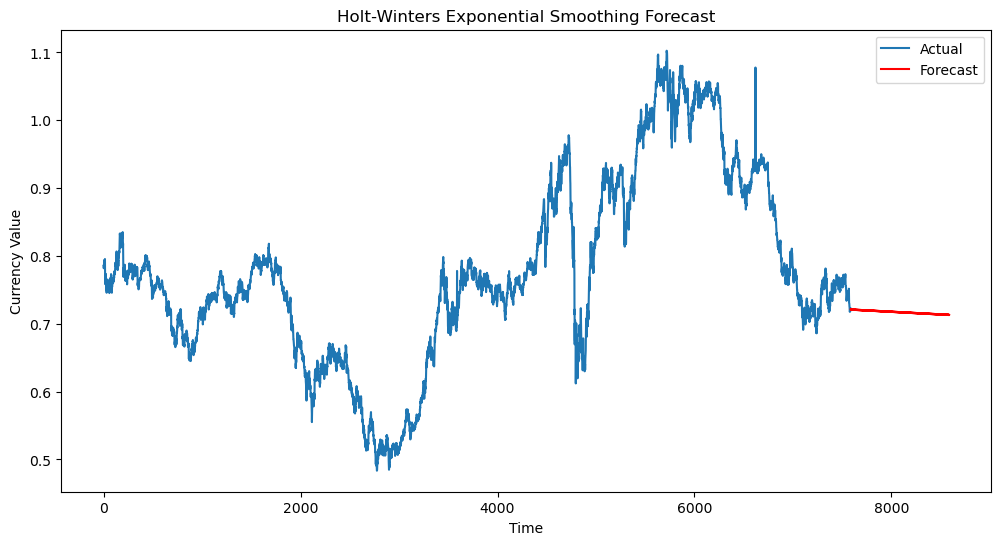

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load your time series data
# Assuming you have loaded it into a DataFrame named 'currency_data'

# Fit Holt-Winters Exponential Smoothing
model = ExponentialSmoothing(df['Ex_rate'], trend="add", seasonal="mul", seasonal_periods=4)
fit_model = model.fit()

# Perform forecasting
forecast = fit_model.forecast(steps=forecast_horizon)  # Specify the number of steps to forecast

# Visualize forecast
plt.figure(figsize=(12, 6))
plt.plot(df['Ex_rate'], label='Actual')
plt.plot(range(len(df['Ex_rate']), len(df['Ex_rate']) + forecast_horizon), forecast, label='Forecast', color='red')
plt.title('Holt-Winters Exponential Smoothing Forecast')
plt.xlabel('Time')
plt.ylabel('Currency Value')
plt.legend()
plt.show()
